### Standard Scaler: This does not change the shape of distribution
###     *Scales features to have zero mean and 1 stdev.
###     *It can be used when data is normally distributed
###      *Does not perform well if data has outliers
### Tree based models are not affected by scaling

### Reason: THe main aim behind sacling/normalization is each variable will have different scale which do not eqaully contribute to model buling. eg:Age column and salary column. If we did not scale these features then it will create bias.This can be very useful for some ML models like the Multi-layer Perceptrons (MLP), where the back-propagation can be more stable and even faster when input features are min-max scaled (or in general scaled) compared to using the original unscaled data.

### X = (X-mean)/std

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
import time

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [64]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.datasets import fetch_california_housing

In [10]:
X,y = fetch_california_housing(as_frame = True, return_X_y = True)

In [13]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
X = X.iloc[:,:-2]

In [31]:
X.shape

(20640, 6)

In [32]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
dtypes: float64(6)
memory usage: 967.6 KB


In [34]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333


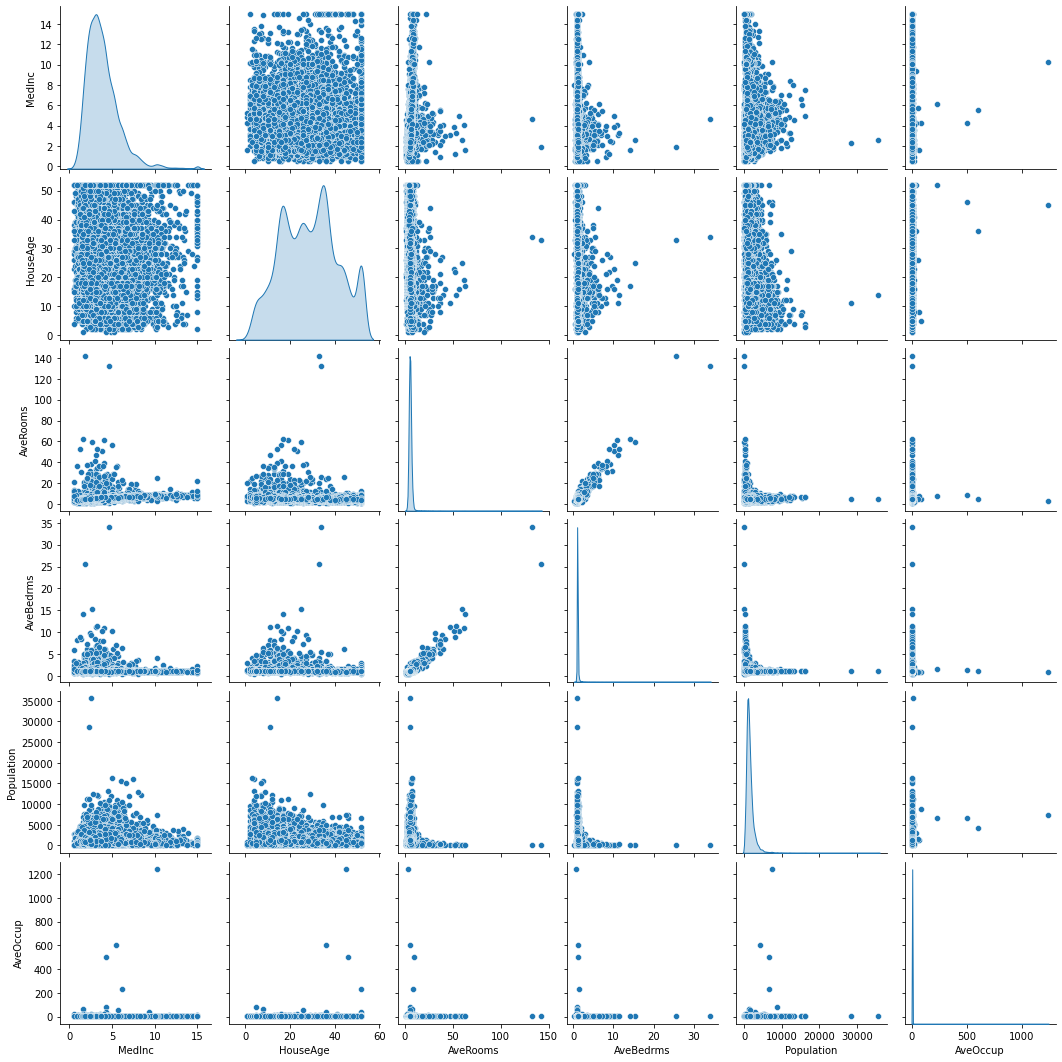

In [35]:
sns.pairplot(X,diag_kind='kde')

In [36]:
def desc_stat(col):
    print('Mean is : ',col.mean())
    print('Mdeian is : ',col.median())
    print('Stdev is : ',col.std())
    print('Skewness is : ',col.skew())

In [37]:
for i in X.columns:
    print("For column :",i)
    desc_stat(X[i])
    print('****************\n')

For column : MedInc
Mean is :  3.8706710029070246
Mdeian is :  3.5347999999999997
Stdev is :  1.8998217179452732
Skewness is :  1.6466567021344465
****************

For column : HouseAge
Mean is :  28.639486434108527
Mdeian is :  29.0
Stdev is :  12.585557612111637
Skewness is :  0.060330637599136865
****************

For column : AveRooms
Mean is :  5.428999742190365
Mdeian is :  5.229128787878788
Stdev is :  2.4741731394243205
Skewness is :  20.697868956710646
****************

For column : AveBedrms
Mean is :  1.0966751496062053
Mdeian is :  1.048780487804878
Stdev is :  0.47391085679546435
Skewness is :  31.316956246782663
****************

For column : Population
Mean is :  1425.4767441860465
Mdeian is :  1166.0
Stdev is :  1132.4621217653375
Skewness is :  4.93585822672712
****************

For column : AveOccup
Mean is :  3.070655159436382
Mdeian is :  2.818115654360196
Stdev is :  10.386049562213591
Skewness is :  97.63956096369479
****************



In [38]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [41]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after' + str(t).split('(')[0])

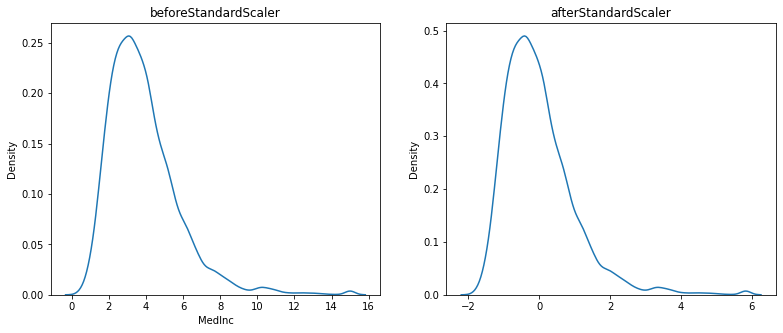

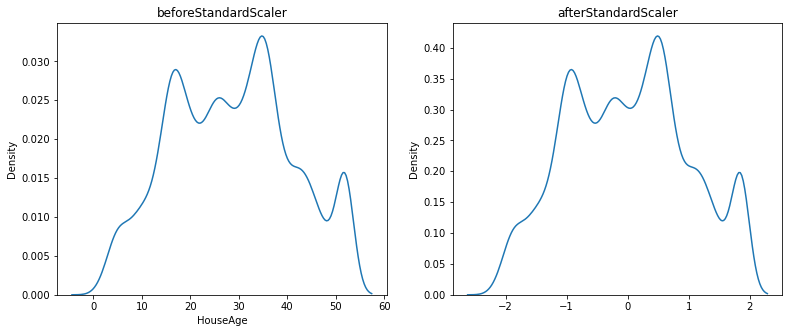

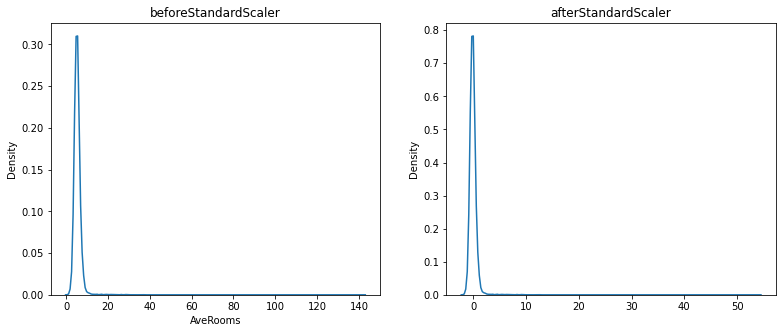

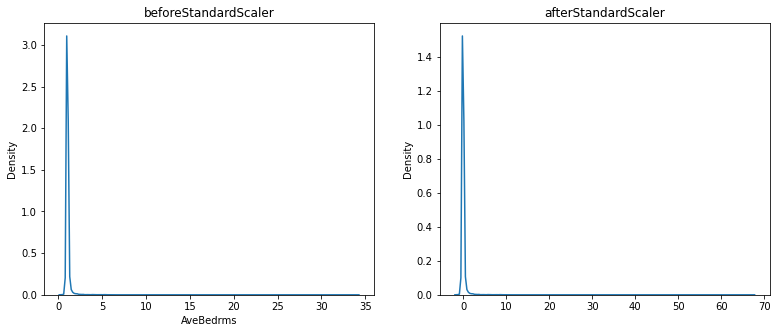

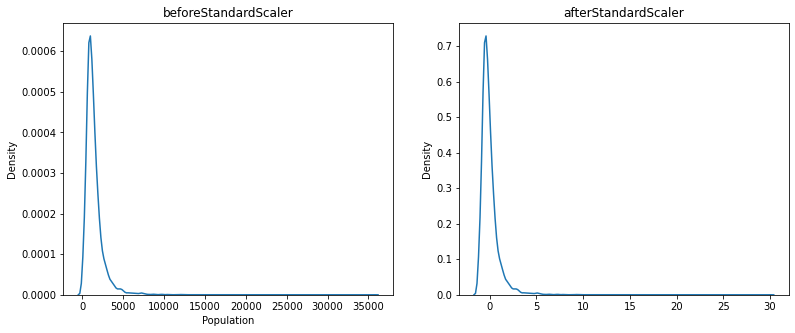

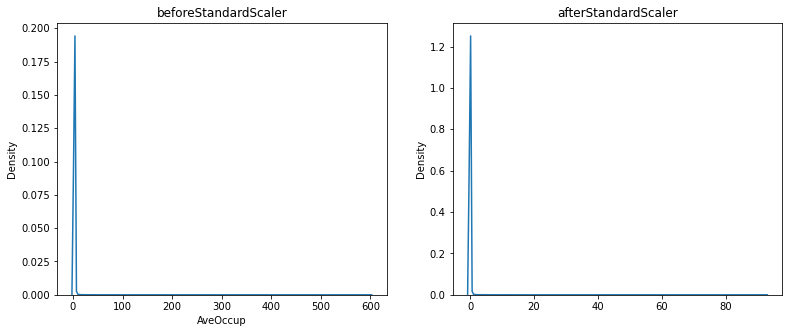

In [42]:
for i in X_train.columns:
    plots(X_train,i,StandardScaler())

In [45]:
scale = StandardScaler()

In [46]:
X_scaled = scale.fit_transform(X)

In [48]:
Scaled_Df = pd.DataFrame(X_scaled,columns=X.columns)

In [53]:
Scaled_Df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616
...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225


In [54]:
for i in Scaled_Df.columns:
    print("For column :",i)
    desc_stat(Scaled_Df[i])
    print('****************\n')

For column : MedInc
Mean is :  3.7342545076817945e-16
Mdeian is :  -0.17679508368599112
Stdev is :  1.000024225686497
Skewness is :  1.646656702134447
****************

For column : HouseAge
Mean is :  8.557000930398215e-16
Mdeian is :  0.028645715246907483
Stdev is :  1.000024225686517
Skewness is :  0.060330637599136865
****************

For column : AveRooms
Mean is :  2.7041111597964976e-16
Mdeian is :  -0.08078488652947444
Stdev is :  1.0000242256864986
Skewness is :  20.697868956710657
****************

For column : AveBedrms
Mean is :  -1.531384300160952e-16
Mdeian is :  -0.10106504503032064
Stdev is :  1.0000242256864993
Skewness is :  31.31695624678267
****************

For column : Population
Mean is :  -6.465442145919217e-17
Mdeian is :  -0.22913175213649464
Stdev is :  1.0000242256864973
Skewness is :  4.935858226727121
****************

For column : AveOccup
Mean is :  6.064808431515814e-19
Mdeian is :  -0.02431584997801906
Stdev is :  1.0000242256864975
Skewness is :  97.

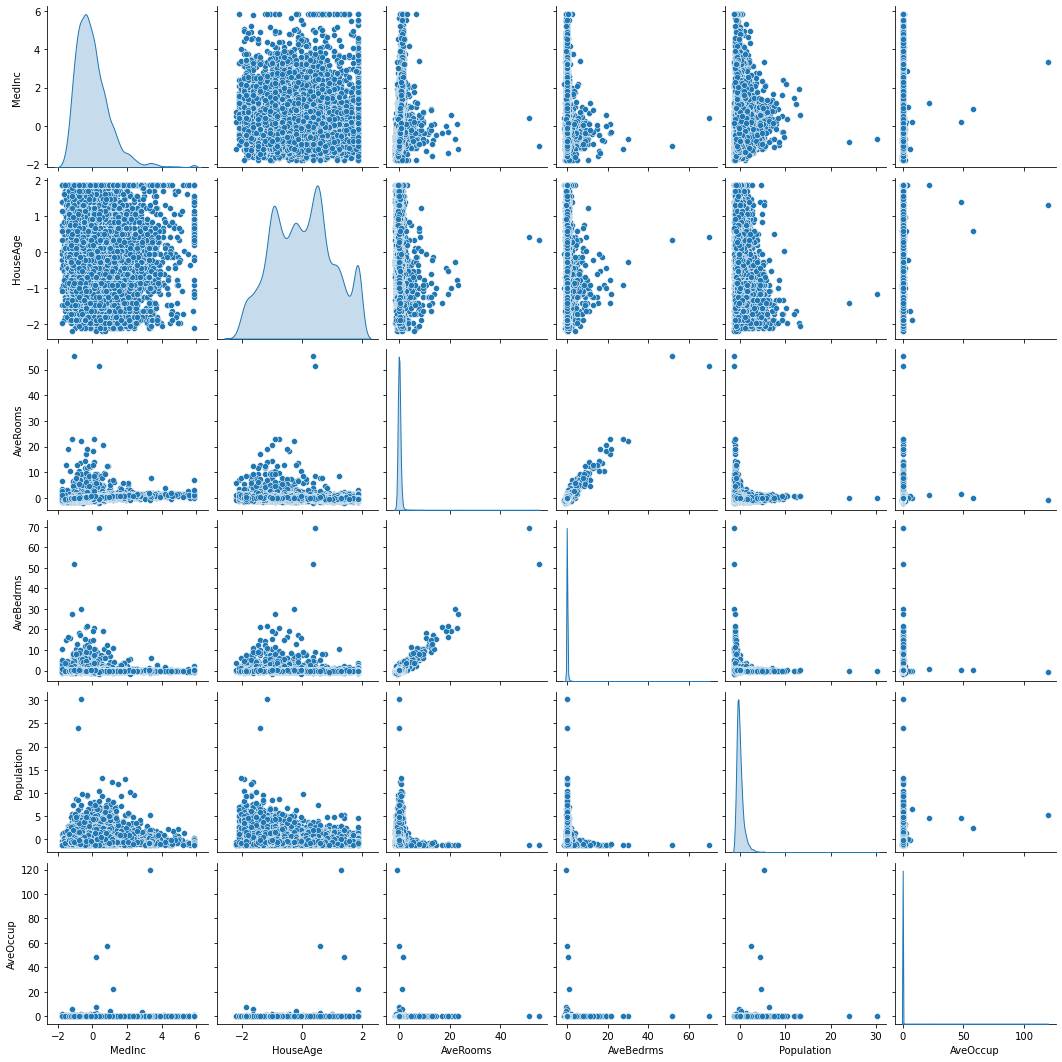

In [56]:
sns.pairplot(Scaled_Df,diag_kind = 'kde')

<AxesSubplot:xlabel='Population', ylabel='Density'>

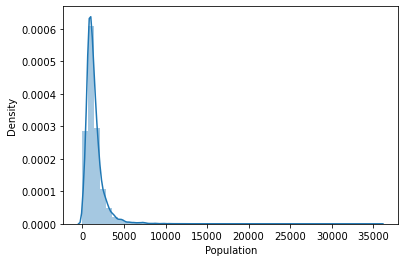

In [57]:
sns.distplot(X['Population'])

<AxesSubplot:xlabel='Population', ylabel='Density'>

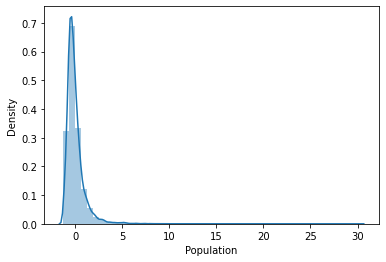

In [58]:
sns.distplot(Scaled_Df['Population'])

In [78]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', StandardScaler()),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

## KNN

In [61]:
model_accuracy_scaled(KNeighborsRegressor())

0.5892398258820833

In [62]:
model_accuracy_unscaled(KNeighborsRegressor())

0.17191143873653625

## Linear Regression

In [82]:
model_accuracy_scaled(LinearRegression())

0.5250770679886758

In [81]:
model_accuracy_unscaled(LinearRegression())

0.5250770679886738

In [83]:
## Scaling has no impact in Linear regression but it improves speed of training

## Decision trees

In [84]:
model_accuracy_scaled(RandomForestRegressor())

0.6681719451594761

In [85]:
model_accuracy_unscaled(RandomForestRegressor())

0.670119228885548

# Min Max scaling: 
### This does not change the shape of distribution 
### Scales features to have value between 0 and 1.
####     *It can be used when data is not normally distributed
####      *Does not perform well if data has outliers

### Xi = (Xi-xmin)/(xmax-xmin)

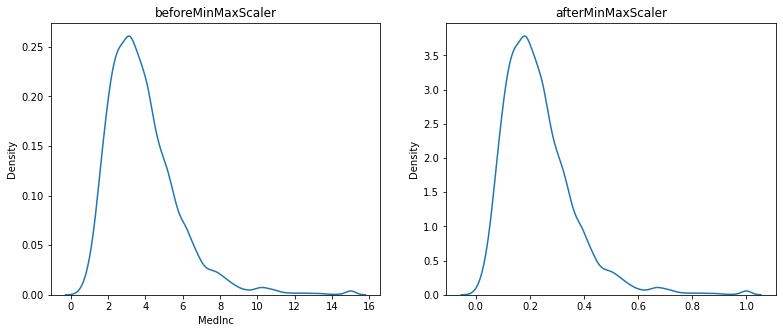

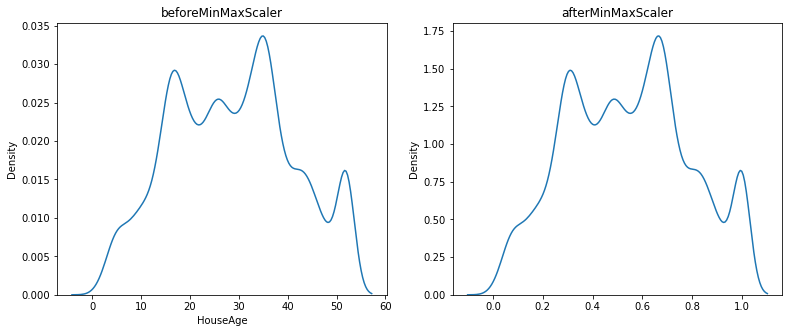

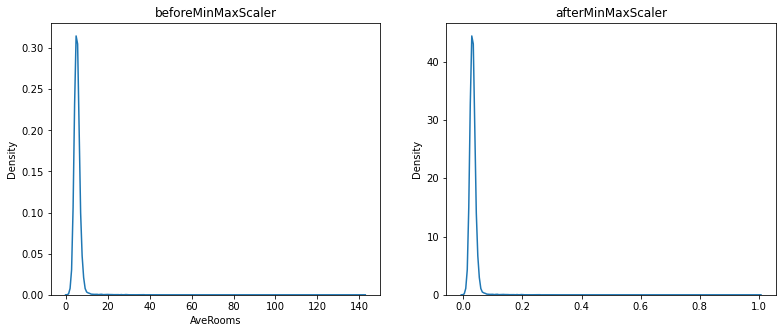

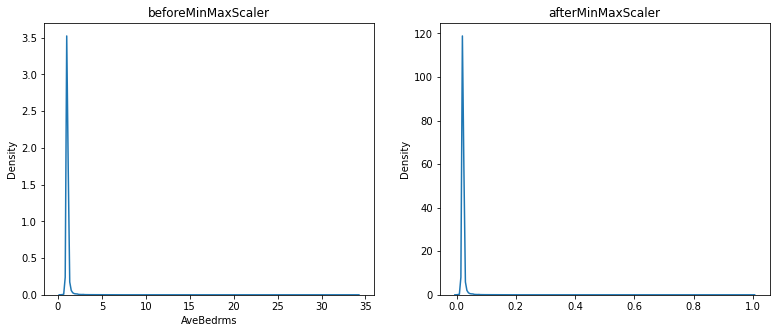

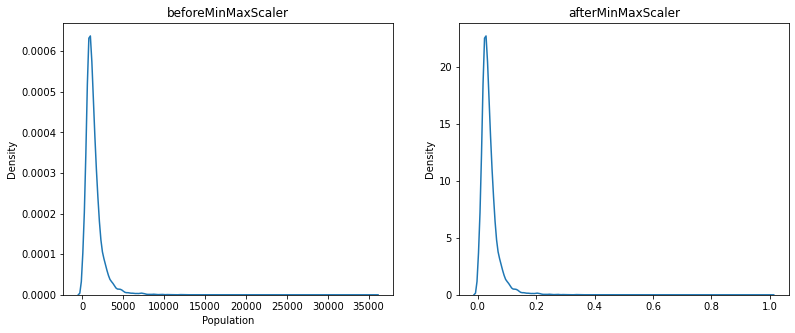

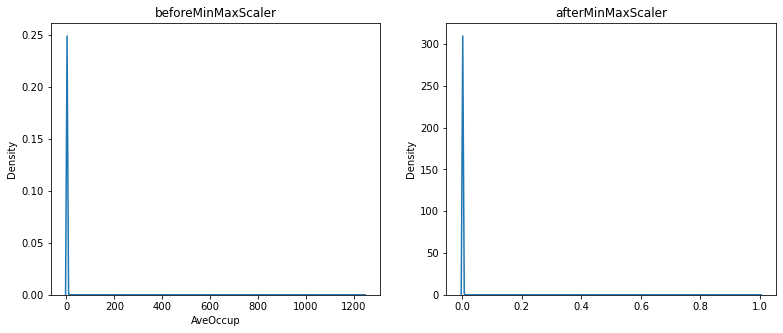

In [88]:
for i in X_train.columns:
    plots(X,i,MinMaxScaler())

In [90]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', MinMaxScaler()),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [91]:
model_accuracy_scaled(KNeighborsRegressor())

0.49873365615746745

In [93]:
model_accuracy_unscaled(KNeighborsRegressor())

0.17191143873653625

In [94]:
model_accuracy_scaled(LinearRegression())

0.5250770679886759

In [95]:
model_accuracy_unscaled(LinearRegression())

0.5250770679886738

In [96]:
model_accuracy_scaled(RandomForestRegressor())

0.6699835909602349

In [97]:
model_accuracy_unscaled(RandomForestRegressor())

0.6698592442027484

## Robust Scaler

### Useful when feature has more outliers
### Subtracts Median not mean
### Does not take min and max values into account.It uses IQR instead.Hence it is robust to outliers
### It will not generally remove outliers. It will reduce the impact of outliers
### Sometimes  changes the distribution slightly


#### Xi = (Xi-xmedian)/(X0.75-X0.25)

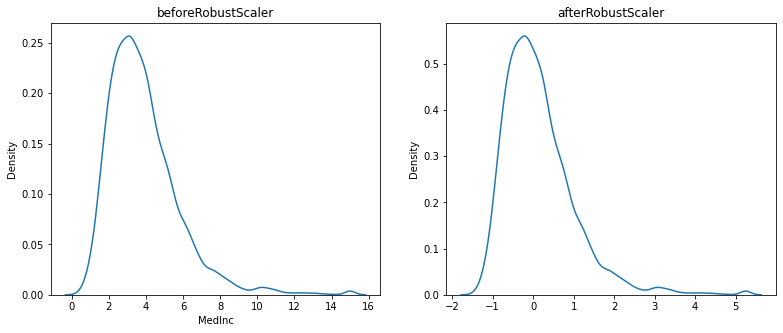

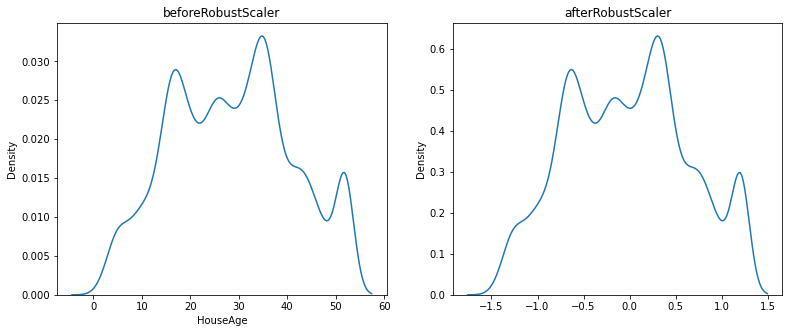

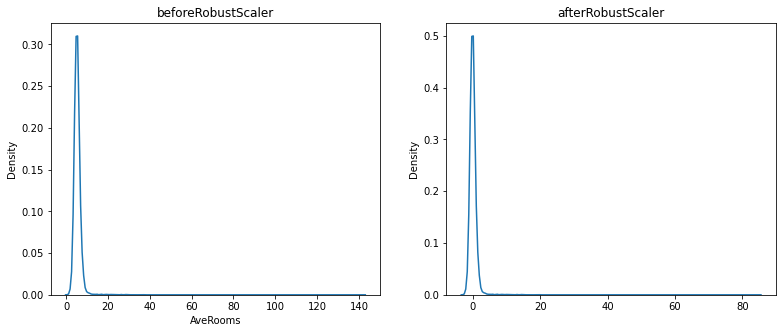

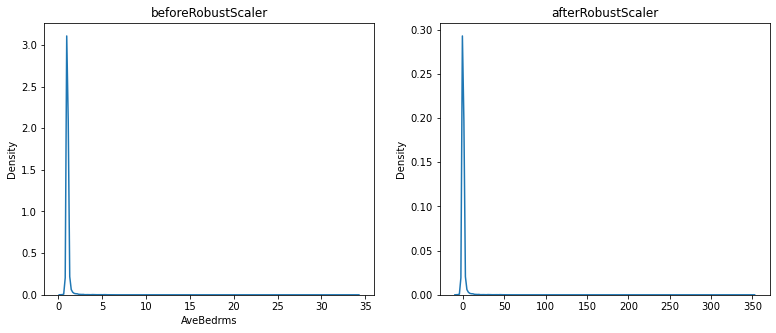

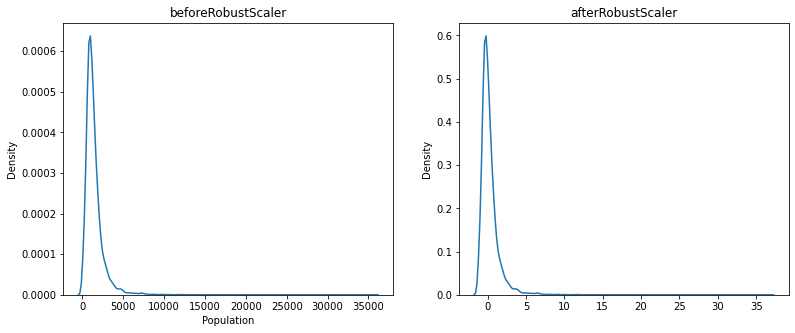

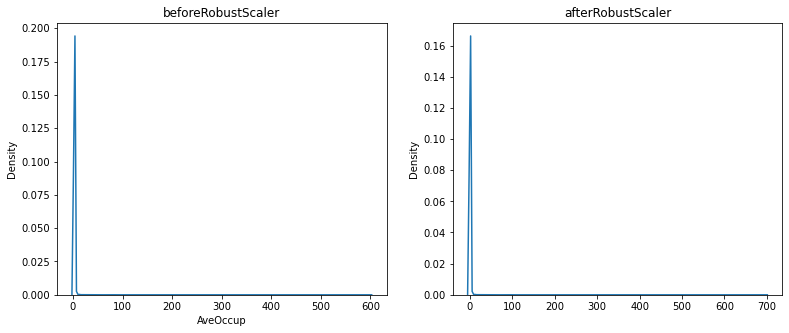

In [100]:
for i in X_train.columns:
    plots(X_train,i,RobustScaler())

In [101]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', RobustScaler()),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [102]:
model_accuracy_scaled(KNeighborsRegressor())

0.6393011074707539

In [103]:
model_accuracy_unscaled(KNeighborsRegressor())

0.17191143873653625

In [104]:
model_accuracy_scaled(LinearRegression())

0.5250770679886758

In [105]:
model_accuracy_unscaled(LinearRegression())

0.5250770679886738

In [106]:
model_accuracy_scaled(RandomForestRegressor())

0.6678178541425117

In [107]:
model_accuracy_unscaled(RandomForestRegressor())

0.6690308008345955

## Maxabs Scaler:
## Not useful when values have outlier
## ranges between -1 to 1

In [109]:
## X = x/abs Xmax